# Step 1: Load the model

In [1]:
import os
os.chdir('/workspaces/Adversraial_Research/')


from Adversarial_Observation.utils import build_cnn
import torch

model = build_cnn()
model.load_state_dict(torch.load('./examples/MNIST_CNN.pt'))
print(model)

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=10, bias=True)
  (8): Softmax(dim=1)
)


In [2]:
# get a single image from the dataset
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, Normalize, ToTensor
from torch.utils.data import DataLoader

transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])
mnist = MNIST('./data', train=True, download=True, transform=transform)
img, label = mnist[0]

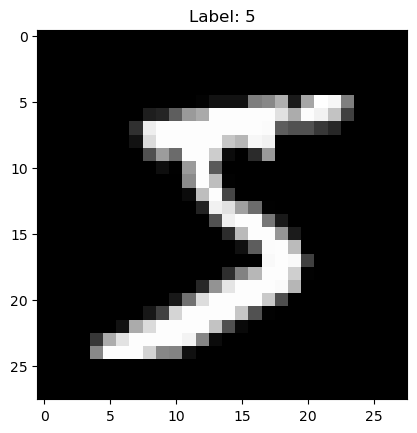

In [3]:
import matplotlib.pyplot as plt

plt.title(f'Label: {label}')
plt.imshow(img.flatten().reshape(28,28), cmap='gray')

# Step 2: Attack the model

/workspaces/Adversraial_Research/Adversarial_Observation/Attacks/fast_gradient_sign.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(input_tensor).to(torch.float32).to(device)


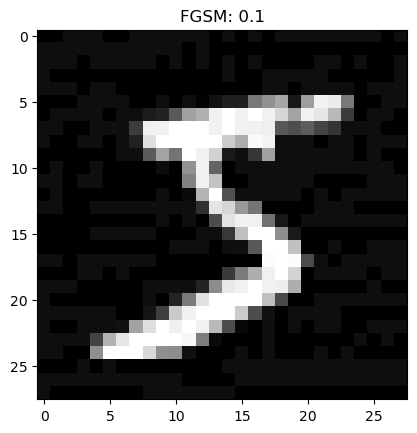

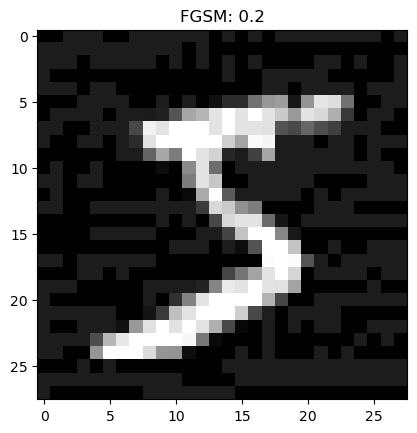

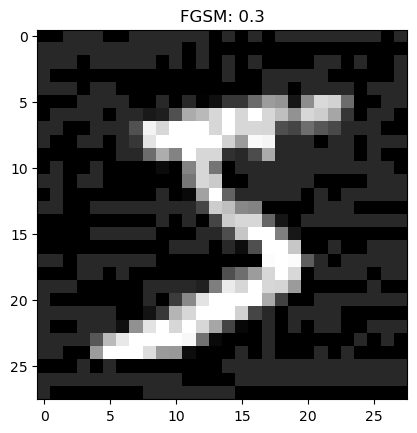

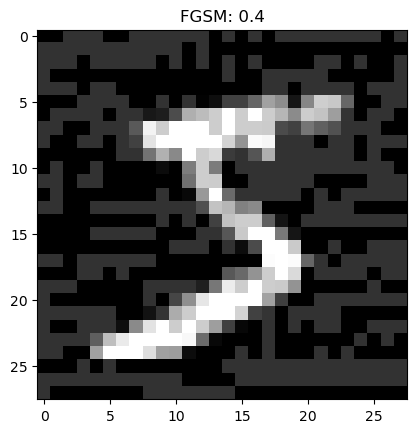

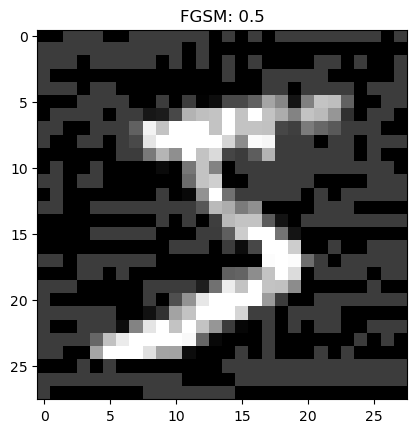

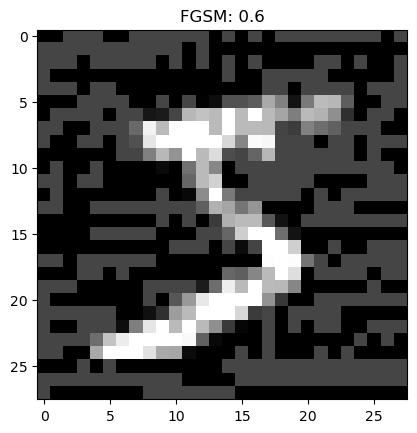

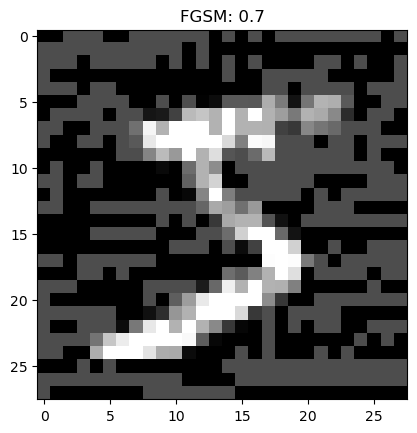

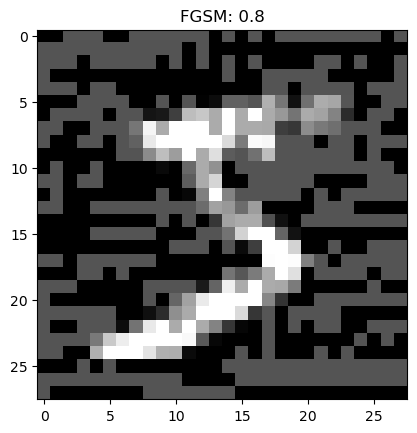

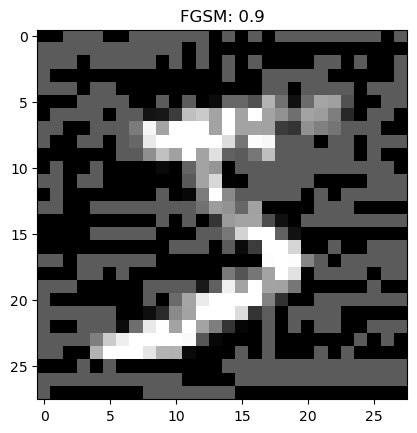

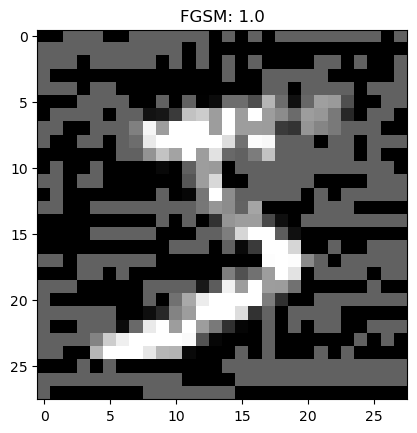

In [4]:
from Adversarial_Observation.Attacks.fast_gradient_sign import fgsm_attack

epsilon = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
for i in epsilon:
    fgsm = fgsm_attack(img.reshape(1,1,28,28), label, i, model)
    plt.title(f'FGSM: {i}')
    plt.imshow(img.reshape(28,28)+fgsm.flatten().reshape(28,28), cmap='gray')
    plt.show()

In [5]:
from Adversarial_Observation.Attacks import activation_map

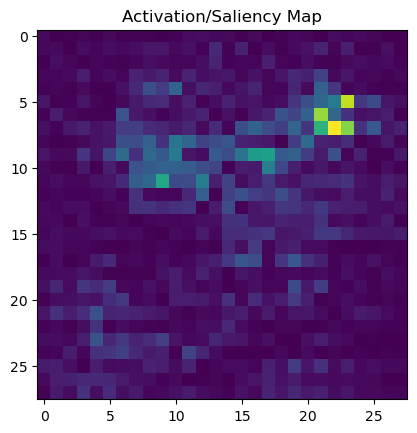

In [6]:
active = activation_map.activation_map(img.reshape(1,1,28,28), model)

plt.title("Activation/Saliency Map")
plt.imshow(active.reshape(28,28))